# Find the Peak Season and Off Season for the year 2020

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
airbnb=pd.read_csv("calendar_hong.csv")
airbnb.columns

airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb.price.isna().sum()

<ipython-input-2-1886f5205890>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)


0

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220295 entries, 0 to 2220294
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           int32 
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 110.1+ MB


In [6]:
np.sum(airbnb.isna())


listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [7]:
airbnb[airbnb.price!=airbnb.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2970176,2021-10-23,f,370,$333.00,4,1125
1,1187738,2021-10-23,t,217,$217.00,30,1125
2,1187738,2021-10-24,t,217,$217.00,30,1125
3,1187738,2021-10-25,t,217,$217.00,30,1125
4,1187738,2021-10-26,t,217,$217.00,30,1125
...,...,...,...,...,...,...,...
2220290,52888883,2022-10-18,f,1280,"$1,216.00",1,1125
2220291,52888883,2022-10-19,f,1280,"$1,216.00",1,1125
2220292,52888883,2022-10-20,f,1280,"$1,216.00",1,1125
2220293,52888883,2022-10-21,f,1480,"$1,406.00",1,1125


In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220295 entries, 0 to 2220294
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           int32 
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 110.1+ MB


In [9]:
airbnb.listing_id.nunique()

6083

In [10]:
airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace(',', '')
airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace('$', '')
airbnb['adjusted_price'] =airbnb['adjusted_price'].astype(float)

<ipython-input-10-9da6fd5f39e0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace('$', '')


In [11]:
airbnb

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2970176,2021-10-23,f,370,333.0,4,1125
1,1187738,2021-10-23,t,217,217.0,30,1125
2,1187738,2021-10-24,t,217,217.0,30,1125
3,1187738,2021-10-25,t,217,217.0,30,1125
4,1187738,2021-10-26,t,217,217.0,30,1125
...,...,...,...,...,...,...,...
2220290,52888883,2022-10-18,f,1280,1216.0,1,1125
2220291,52888883,2022-10-19,f,1280,1216.0,1,1125
2220292,52888883,2022-10-20,f,1280,1216.0,1,1125
2220293,52888883,2022-10-21,f,1480,1406.0,1,1125


In [12]:
airbnb[airbnb.listing_id==1187738]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,1187738,2021-10-23,t,217,217.0,30,1125
2,1187738,2021-10-24,t,217,217.0,30,1125
3,1187738,2021-10-25,t,217,217.0,30,1125
4,1187738,2021-10-26,t,217,217.0,30,1125
5,1187738,2021-10-27,t,217,217.0,30,1125
...,...,...,...,...,...,...,...
361,1187738,2022-10-18,t,217,217.0,30,1125
362,1187738,2022-10-19,t,217,217.0,30,1125
363,1187738,2022-10-20,t,217,217.0,30,1125
364,1187738,2022-10-21,t,217,217.0,30,1125


In [13]:
cal2022 = airbnb[~airbnb['date'].str.contains("2021")].reset_index(drop=True)

In [14]:
cal2022

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1187738,2022-01-01,t,217,217.0,30,1125
1,1187738,2022-01-02,t,217,217.0,30,1125
2,1187738,2022-01-03,t,217,217.0,30,1125
3,1187738,2022-01-04,t,217,217.0,30,1125
4,1187738,2022-01-05,t,217,217.0,30,1125
...,...,...,...,...,...,...,...
1794480,52888883,2022-10-18,f,1280,1216.0,1,1125
1794481,52888883,2022-10-19,f,1280,1216.0,1,1125
1794482,52888883,2022-10-20,f,1280,1216.0,1,1125
1794483,52888883,2022-10-21,f,1480,1406.0,1,1125


In [15]:
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-01-.*$)', 'january')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-02-.*$)', 'february')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-03-.*$)', 'march')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-04-.*$)', 'april')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-05-.*$)', 'may')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-06-.*$)', 'june')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-07-.*$)', 'july')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-08-.*$)', 'august')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-09-.*$)', 'septemer')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-10-.*$)', 'october')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-11-.*$)', 'november')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-12-.*$)', 'december')

<ipython-input-15-85612300ede1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-01-.*$)', 'january')
<ipython-input-15-85612300ede1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-02-.*$)', 'february')
<ipython-input-15-85612300ede1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-03-.*$)', 'march')
<ipython-input-15-85612300ede1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-04-.*$)', 'april')
<ipython-input-15-85612300ede1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.

In [16]:
cal2022

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1187738,january,t,217,217.0,30,1125
1,1187738,january,t,217,217.0,30,1125
2,1187738,january,t,217,217.0,30,1125
3,1187738,january,t,217,217.0,30,1125
4,1187738,january,t,217,217.0,30,1125
...,...,...,...,...,...,...,...
1794480,52888883,october,f,1280,1216.0,1,1125
1794481,52888883,october,f,1280,1216.0,1,1125
1794482,52888883,october,f,1280,1216.0,1,1125
1794483,52888883,october,f,1480,1406.0,1,1125


In [17]:
del cal2022["price"]
del cal2022["available"]
del cal2022["minimum_nights"]
del cal2022["maximum_nights"]

In [18]:
airbnb.date.value_counts().sort_index()


2021-10-23    6083
2021-10-24    6083
2021-10-25    6083
2021-10-26    6083
2021-10-27    6083
              ... 
2022-10-18    6083
2022-10-19    6083
2022-10-20    6083
2022-10-21    6083
2022-10-22    6083
Name: date, Length: 365, dtype: int64

In [19]:
month_price_avg = cal2022.groupby(['date']).mean()['adjusted_price']

In [20]:
month_price_avg = month_price_avg.reindex(index=['january', 'february', 'march', 'april', 'may', 'june', 'july',
                                                'august', 'septemer', 'october'])
prices = list(month_price_avg)

In [21]:
month_price_avg.index

Index(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'septemer', 'october'],
      dtype='object', name='date')

In [22]:
month_price_avg_df = pd.DataFrame(month_price_avg.index, prices)

In [23]:
month_price_avg_df

,date
825.312144,january
825.852105,february
822.677605,march
825.828599,april
823.005351,may
783.304422,june
783.669327,july
768.662062,august
766.825152,septemer
770.919343,october


In [24]:

month_price_avg_df.reset_index(inplace=True)
month_price_avg_df.columns = ['avg_price', 'month']
# re-ordering the columns

month_price_avg_df = month_price_avg_df[['month', 'avg_price']]
# this is the final dataframe to calculate the peak season and off season

month_price_avg_df

,month,avg_price
0,january,825.312144
1,february,825.852105
2,march,822.677605
3,april,825.828599
4,may,823.005351
5,june,783.304422
6,july,783.669327
7,august,768.662062
8,septemer,766.825152
9,october,770.919343


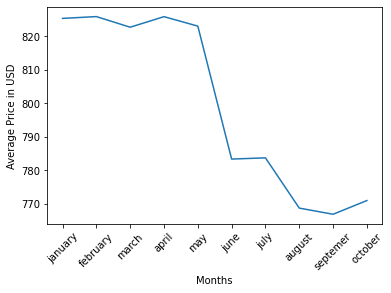

In [25]:
plt.plot(month_price_avg_df.month, month_price_avg_df.avg_price);
plt.xticks(rotation=45);
plt.xlabel("Months");
plt.ylabel("Average Price in USD");

It is evident that January to May is the peak season with average price ranging from $784 to $825 and august to october are comparatively lower with average price ranging from $766 to $771